
The prediction task is to determine whether a person makes over $50K a year or not.

In [2]:
import pandas as pd
df=pd.read_csv("ci.csv",sep=",") 
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Exploratory Data Analysis


Handling Null Values


<AxesSubplot:>

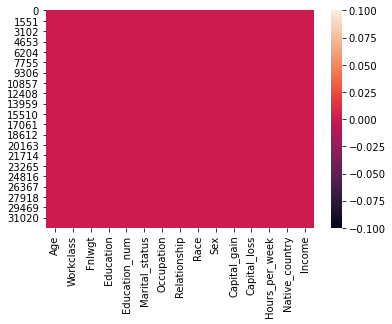

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.isnull())

Checking for ? values in dataset

In [7]:
df.isin([' ?']).sum() 

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Replacing ? values with Mode of the object columns

In [8]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col]=df[col].replace(' ?', df[col].mode()[0])

Getting the list of int64 columns in int_list

In [9]:
int_list=list(df.select_dtypes(['int64']).columns) 

# Univariate Analysis

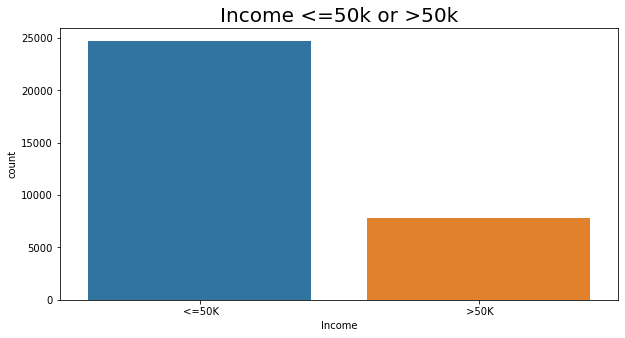

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) 
sns.countplot(x="Income", data=df) 
plt.title("Income <=50k or >50k", fontsize = 20)
plt.show()

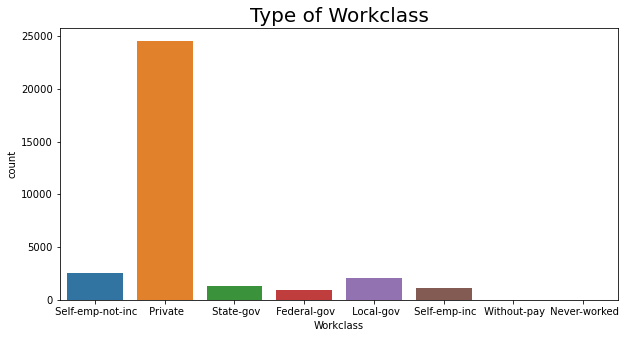

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(x="Workclass", data=df)
plt.title("Type of Workclass", fontsize = 20)
plt.show()

Private Employee participated more 

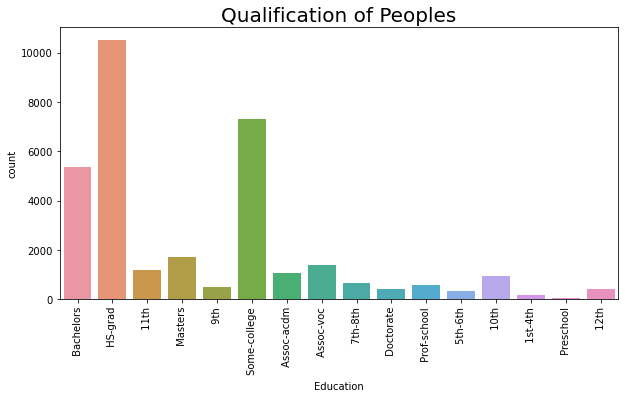

In [13]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Education", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Qualification of Peoples", fontsize = 20)
plt.show()

The person who did HS-Grad is earning more than others

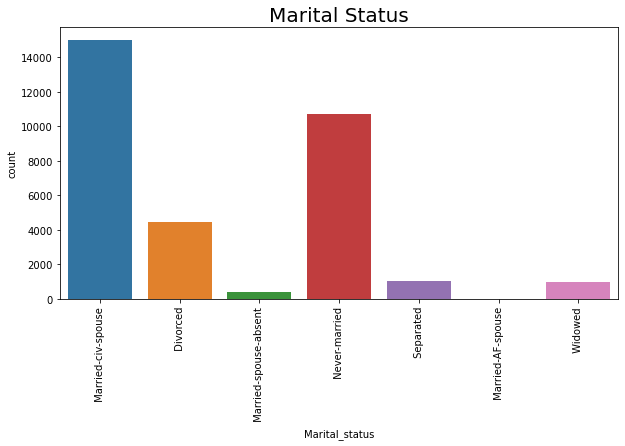

In [14]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Marital_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Marital Status", fontsize = 20)
plt.show()

Married-civ-spouse have more income than others

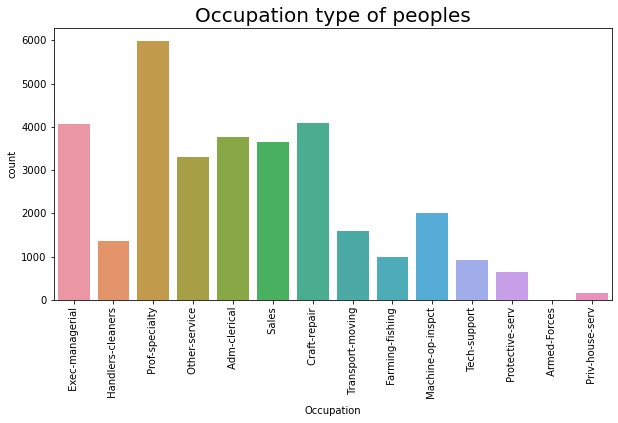

In [16]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Occupation", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Occupation type of peoples", fontsize = 20)
plt.show()


People who's occupation is Prof-specialty have more number than others Occupation peoples.

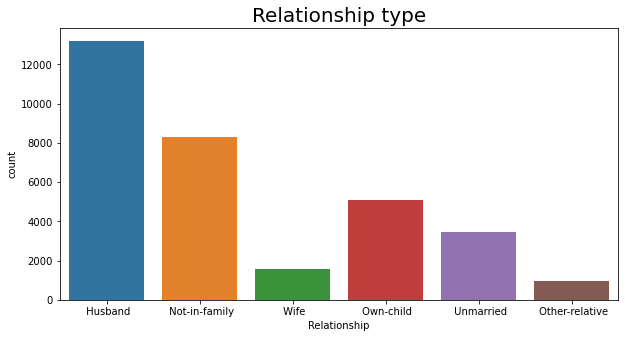

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x="Relationship", data=df)
plt.title("Relationship type", fontsize = 20)
plt.show()

Husband are earning more than any other person of family

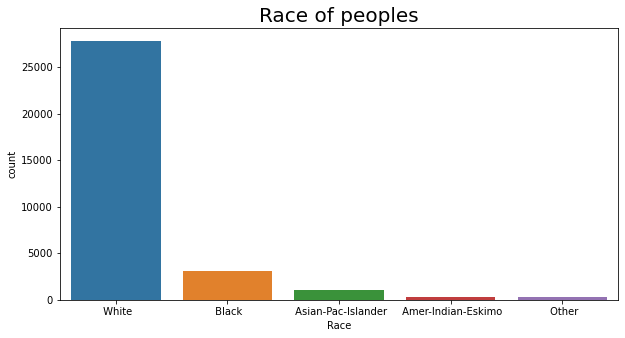

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x="Race", data=df)
plt.title("Race of peoples", fontsize = 20)
plt.show()


White peoples have more earning than other race of peoples

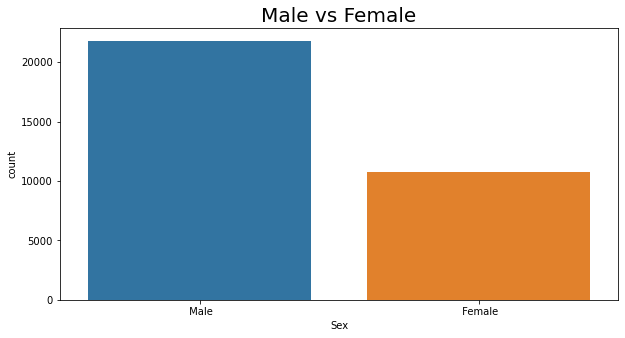

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x="Sex", data=df)
plt.title("Male vs Female", fontsize = 20)
plt.show()


Male earning more than Female

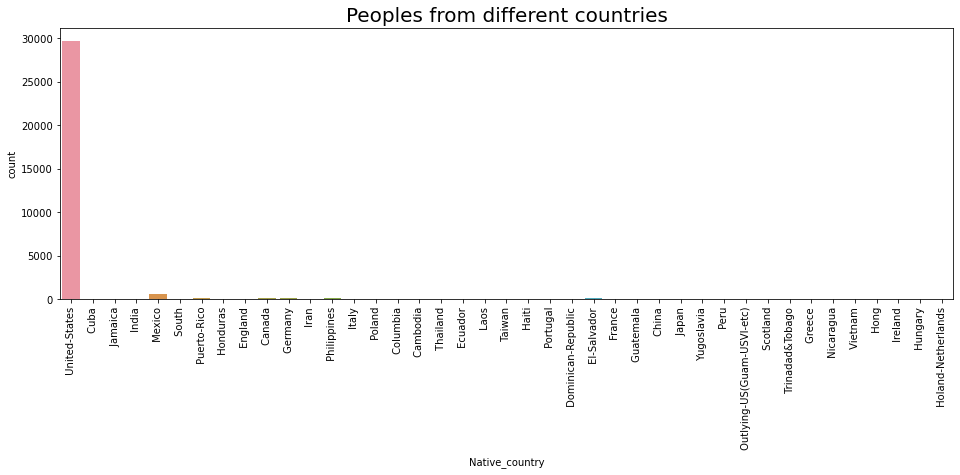

In [20]:
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Native_country", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Peoples from different countries", fontsize = 20)
plt.show()

United-States peoples are earning more than other country peoples

# Bi-variate Analysis


<AxesSubplot:xlabel='Income', ylabel='Age'>

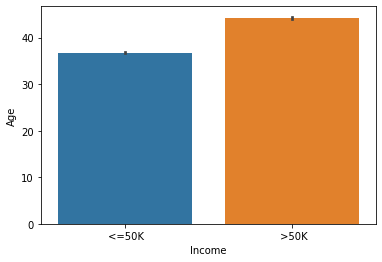

In [21]:
sns.barplot(x = 'Income', y = 'Age', data = df)

People who have age less than 40 are earning less than 50k and people who have age more than 40 are earning more than 50k

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

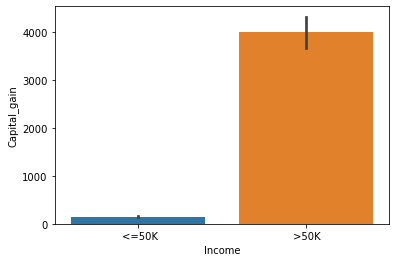

In [22]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = df)

If Capital_gain is less than 200 than Income will be less than 50k and if Capital
gain is more than 3800 than income will be more than 50k

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

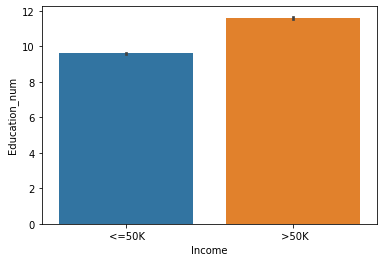

In [23]:
sns.barplot(x = 'Income', y = 'Education_num', data = df)

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

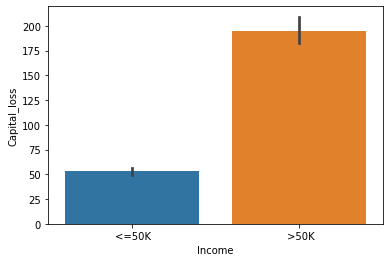

In [24]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = df)


If Capital Loss is 50, income will be less than 50k and If Capital loss is more than 175, income will be more than 50k

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

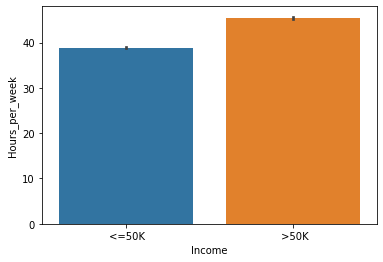

In [25]:
sns.barplot(x = 'Income', y = 'Hours_per_week', data = df)

If hours per week is less than 40 then Income will be less than 50k, 
If hours per week is more than 40 then Income will be more than 50k

In [27]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital_gain and Capital_loss have min values 0 and 25,50 and 75% values are Zeros.

There is much difference in values of different columns, so we'll do scaling.

In [28]:
label_list=list(df.select_dtypes(['object']).columns)  
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [29]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


shuffling the dataset
This will Shuffle our dataset and it will avoid biasness of prediction

In [30]:
df = df.sample(frac=1, random_state = 0)

# Multi-Variate Analysis

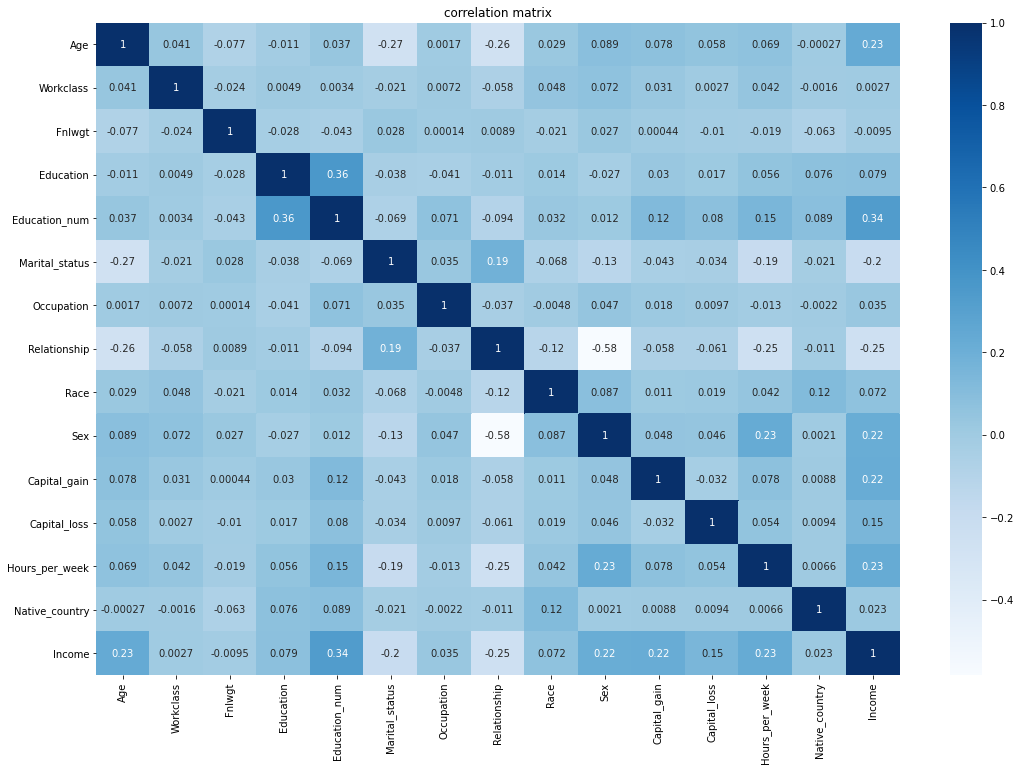

In [31]:
fig=plt.figure(figsize=(18,12))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
plt.title("correlation matrix")
plt.show()

We can clearly see that there is not much correlation, even though Education_num have heighst corelation i.e. 34%

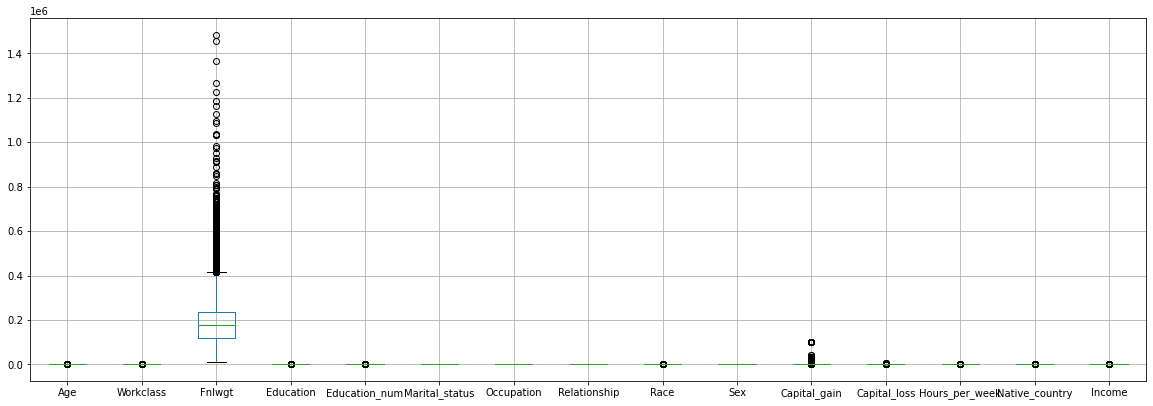

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([    2,     4,     9, ..., 32539, 32547, 32551], dtype=int64), array([13, 12,  0, ...,  8, 10,  8], dtype=int64))


In [34]:

df1=df[(z<3).all(axis = 1)]
print(df.shape)
print(df1.shape)

(32560, 15)
(27770, 15)


In [35]:
loss_percent=(32559-27769)/32559*100
print(loss_percent)

14.7117540465002


More than 14% of data we have to drop but this much amount of data is not good to drop.

In [36]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [37]:
x.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

In [38]:

from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer() 
for i in int_list:
    if abs(x.loc[:,i].skew())>0.55:
        x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1)) 

# Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() 
new = scale.fit(x)  
scale_x = new.transform(x) 

scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
22278,0.476686,0.571429,0.336528,1.000000,0.6,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.397959,0.95
8950,0.561811,0.428571,0.330628,1.000000,0.6,0.666667,0.230769,0.8,1.0,0.0,0.0,0.0,0.448980,0.95
7838,0.362885,0.428571,0.345955,0.333333,0.2,0.833333,0.692308,0.2,1.0,1.0,0.0,0.0,0.397959,0.30
16505,0.110668,0.428571,0.327069,1.000000,0.6,0.666667,0.000000,0.6,1.0,0.0,0.0,0.0,0.153061,0.95
19140,0.718571,0.428571,0.228073,0.333333,0.2,0.333333,0.538462,1.0,1.0,0.0,0.0,0.0,1.000000,0.95


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8249385749385749  on Random_state  101


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [43]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())

accuracy score of -> LogisticRegression()
0.8249385749385749
[[6988  453]
 [1257 1070]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7441
           1       0.70      0.46      0.56      2327

    accuracy                           0.82      9768
   macro avg       0.78      0.70      0.72      9768
weighted avg       0.81      0.82      0.81      9768

[0.81388206 0.81695332 0.81787469 0.81541769 0.817414  ]
0.8163083538083538
Difference between Accuracy score and cross validation score is -  0.00863022113022116
accuracy score of -> KNeighborsClassifier()
0.828009828009828
[[6690  751]
 [ 929 1398]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7441
           1       0.65      0.60      0.62      2327

    accuracy                           0.83      9768
   macro avg       0.76      0.75      0.76      9768
weighted avg       0.82      0.83      0.83      9768

[0.822

In [ ]:

Random Forest Classifier have the heighst Accuracy and cross validation Score i.e. 85.97%

In [45]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'min_samples_leaf': 5, 'max_features': 3, 'max_depth': 20}

In [46]:
clf_pred=clf.best_estimator_.predict(x_test) 

In [47]:
accuracy_score(y_test,clf_pred)

0.8645577395577395

In [48]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8645577395577395
[[7022  419]
 [ 904 1423]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7441
           1       0.77      0.61      0.68      2327

    accuracy                           0.86      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



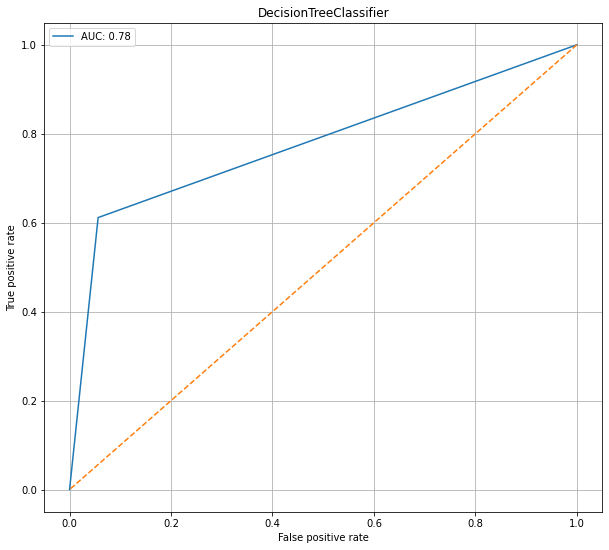

In [49]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

In [50]:
import joblib
joblib.dump(clf.best_estimator_,"Census.obj")
SVR_from_joblib=joblib.load("Census.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([1, 0, 1, ..., 0, 0, 1])

In [51]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     1     0     1     0     0     0     0     0     0     1     0   
Original      1     0     0     0     0     0     0     0     0     1     0   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     0     1     0     0     0     0     0     0     0     0     0   
Original      0     1     1     0     0     0     0     0     0     1     0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     0     1     0     0     0     0     0     1     0     0     0   
Original      0     0     0     0     0     0     1     1     0     0     0   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     1     0     0     0     0     0     0     1     1     0   
Original      0     1     1     0     0     0     0     0     0     1     0   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     0     0     0     0     0     0     0     0     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     0     0     0     1     0     0     0     0     0     0     0   
Original      0     0     0     1     0     0     0     0     0     0     0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     0     0     0     0     0     1     0     0     1     0     0   
Original      0     0     0     0     0     0     0     0     1     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     0     0     1     0     0     1     1     0     0     0     0   
Original      0     0     0     0     0     0     1     0     0     0     0   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     0     0     0     1     0     1     0     0     0     0     0   
Original      0     0     0     1     0     1     0     0     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     1     0     0     0     1     0     0     0     0     0     0   
Original      0     0     1     1     1     0     0     0     0     0     0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     0     0     0     1     0     0     1     0     0     0   
Original      0     0     0     0     1     0     1     1     0     0     0   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     0     0     1     0     0     0     0     0     1   
Original      0     0     0     0     0     1     0     1     0     0     1   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     1     0     0     0     0     0     0     0     0     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     1     0     1     0     0     0     0     0   
Original      1     0     0     1     0     1     0     0     0     1     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     0     1     0     0     1     0     0     1     0     0     0   
Original      0     0     0     0     1     0     0     0     1     1     0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     0     0     0     0     0     0     0     0     1     0     0   
Original      0     0     0     0     0     0     0     0     1     0     0   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     1     0     0     0     0     0     0     0     0     0     0   
Original      0     0     0     0     1     0